# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Vallerie Britania
- Email: valleriebritania@gmail.com
- Id Dicoding: br1tania

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd 
import numpy as np             
import matplotlib.pyplot as plt 
import seaborn as sns    
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils import resample, shuffle
import os
from joblib import dump

### Menyiapkan data yang akan digunakan

In [3]:
df = pd.read_csv('data/data.csv', delimiter=';')

## Data Understanding

In [45]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [46]:
print("Jumlah kolom pada dataset ini adalah :", len(df.columns))
print("\nBerikut adalah nama-nama kolom pada dataset:")
for i in df.columns:
    print(i)

Jumlah kolom pada dataset ini adalah : 37

Berikut adalah nama-nama kolom pada dataset:
Marital_status
Application_mode
Application_order
Course
Daytime_evening_attendance
Previous_qualification
Previous_qualification_grade
Nacionality
Mothers_qualification
Fathers_qualification
Mothers_occupation
Fathers_occupation
Admission_grade
Displaced
Educational_special_needs
Debtor
Tuition_fees_up_to_date
Gender
Scholarship_holder
Age_at_enrollment
International
Curricular_units_1st_sem_credited
Curricular_units_1st_sem_enrolled
Curricular_units_1st_sem_evaluations
Curricular_units_1st_sem_approved
Curricular_units_1st_sem_grade
Curricular_units_1st_sem_without_evaluations
Curricular_units_2nd_sem_credited
Curricular_units_2nd_sem_enrolled
Curricular_units_2nd_sem_evaluations
Curricular_units_2nd_sem_approved
Curricular_units_2nd_sem_grade
Curricular_units_2nd_sem_without_evaluations
Unemployment_rate
Inflation_rate
GDP
Status


In [47]:
print("Berikut adalah tipe data data setiap kolom pada dataset")
print(df.info()) 

Berikut adalah tipe data data setiap kolom pada dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers

In [48]:
print('Jumlah baris dalam dataset ini adalah :', df.shape[0])

Jumlah baris dalam dataset ini adalah : 4424


Terdapat 36 kolom dan 4424 baris pada dataset ini

In [49]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               

Tidak terdapat ada duplikasi data dan data yang kosong

## Data Preparation / Preprocessing

In [50]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Status'], dtype='object')


In [58]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [52]:
status_col = df['Status']
dummies = pd.get_dummies(df['Status'], drop_first=False)
df = pd.concat([df, dummies], axis=1)
df['Status'] = status_col

In [53]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,Dropout,True,False,False
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,False,False,True
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,True,False,False
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,False,False,True
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,False,False,True


## Modeling

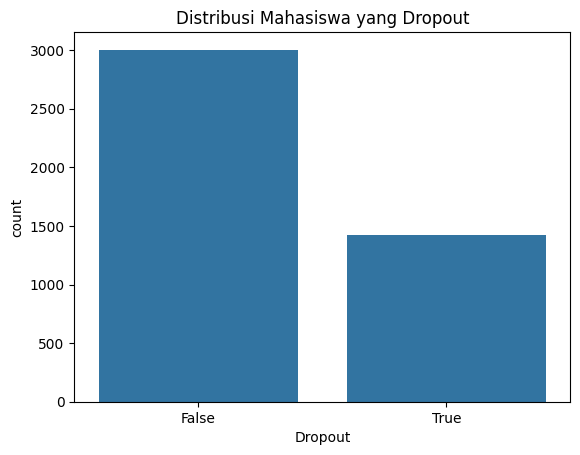

Dropout
False    67.879747
True     32.120253
Name: proportion, dtype: float64


In [54]:
# Distribusi target
sns.countplot(data=df, x='Dropout')
plt.title('Distribusi Mahasiswa yang Dropout')
plt.show()

# Persentase attrition
dropout_rate = df['Dropout'].value_counts(normalize=True) * 100
print(dropout_rate)

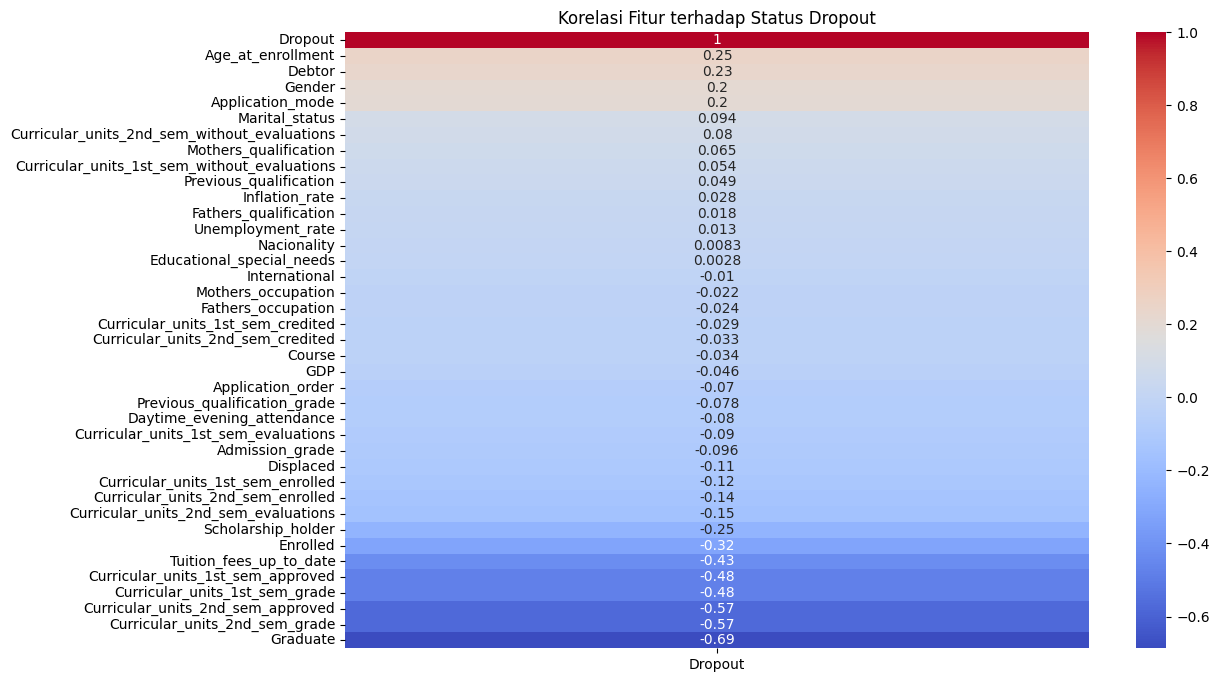

In [59]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation[['Dropout']].sort_values(by='Dropout', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur terhadap Status Dropout')
plt.show()

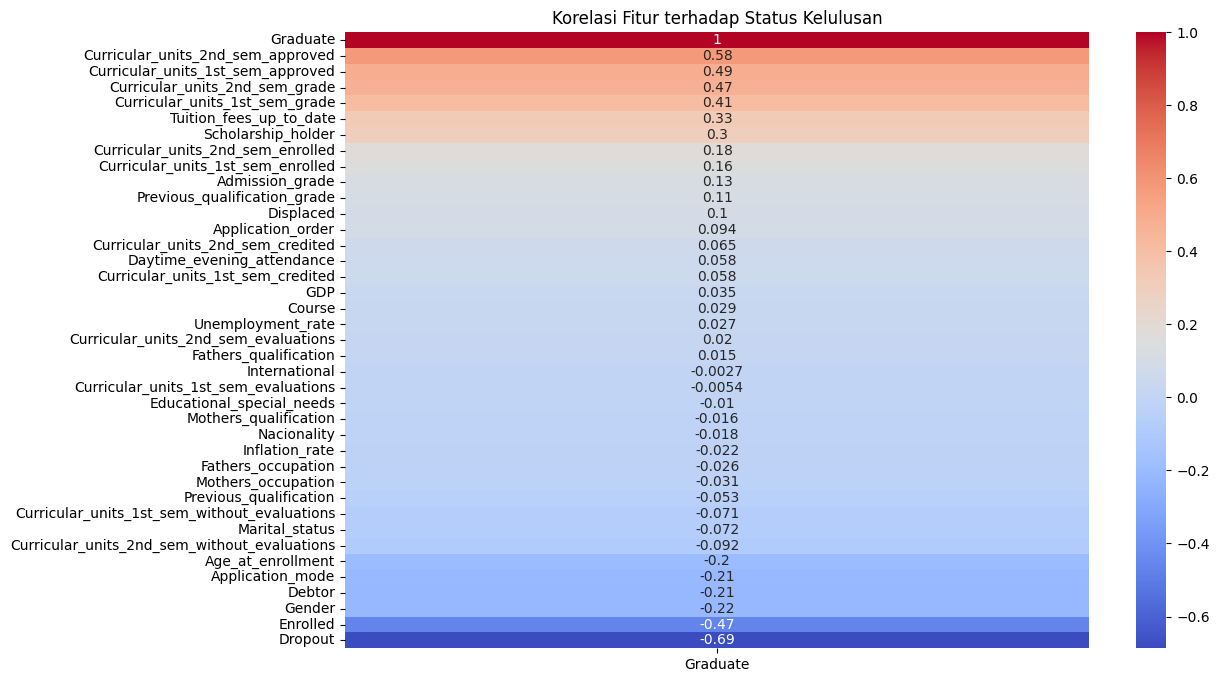

In [60]:
correlation2 = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation2[['Graduate']].sort_values(by='Graduate', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur terhadap Status Kelulusan')
plt.show()

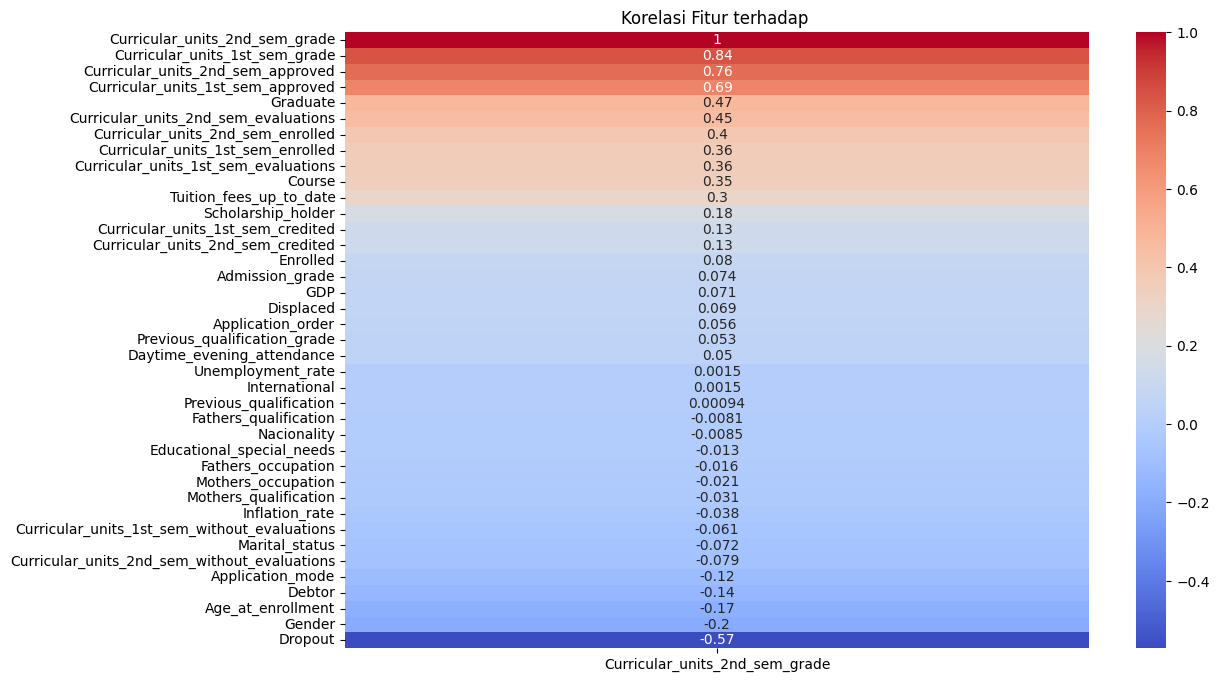

In [61]:
correlation3 = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation3[['Curricular_units_2nd_sem_grade']].sort_values(by='Curricular_units_2nd_sem_grade', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur terhadap ')
plt.show()

In [93]:
df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [94]:
df_majority = df[(df.Status == "Graduate")]
df_minority = df[(df.Status == "Dropout")]

In [95]:
df_majority_1_undersampled = resample(df_majority, n_samples=len(df_minority), random_state=42)
print(df_majority_1_undersampled.shape)

(1421, 40)


In [96]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Dropout,Enrolled,Graduate
11,1,1,5,9119,1,1,132.0,1,38,19,...,0,0.000000,0,9.4,-0.8,-3.12,Dropout,True,False,False
463,1,17,3,9853,1,1,140.0,1,38,38,...,3,10.666667,0,10.8,1.4,1.74,Dropout,True,False,False
1526,1,1,1,9070,1,1,124.0,1,37,19,...,6,11.500000,0,16.2,0.3,-0.92,Graduate,False,False,True
2370,2,7,1,9991,0,3,140.0,1,34,34,...,0,0.000000,0,7.6,2.6,0.32,Dropout,True,False,False
252,1,39,1,9119,1,1,120.0,1,37,37,...,3,12.400000,0,12.4,0.5,1.79,Graduate,False,False,True


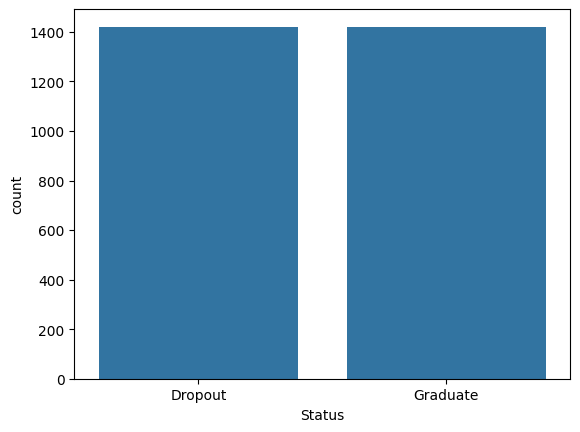

In [97]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

In [98]:
undersampled_train_df['Status'] = undersampled_train_df['Status'].map({'Dropout': 0, 'Graduate': 1})

In [99]:
X = undersampled_train_df.drop(['Status', 'Graduate', 'Dropout', 'Enrolled'], axis=1)
y = undersampled_train_df['Status']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, stratify=y, random_state=42
)

In [101]:
os.makedirs("model", exist_ok=True)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Network)": MLPClassifier(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    filename = f"model/{name.replace(' ', '_').lower()}.joblib"
    dump(model, filename)
    print(f"Model disimpan ke: {filename}")

d:\vallerie\submission-data-science-2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model disimpan ke: model/logistic_regression.joblib
Model disimpan ke: model/random_forest.joblib
Model disimpan ke: model/svm.joblib
Model disimpan ke: model/knn.joblib
Model disimpan ke: model/naive_bayes.joblib
Model disimpan ke: model/mlp_(neural_network).joblib
Model disimpan ke: model/xgboost.joblib


d:\vallerie\submission-data-science-2\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Evaluation


Evaluasi Model: Logistic Regression
Akurasi: 0.9021
              precision    recall  f1-score   support

     Dropout       0.89      0.92      0.90        72
    Graduate       0.91      0.89      0.90        71

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



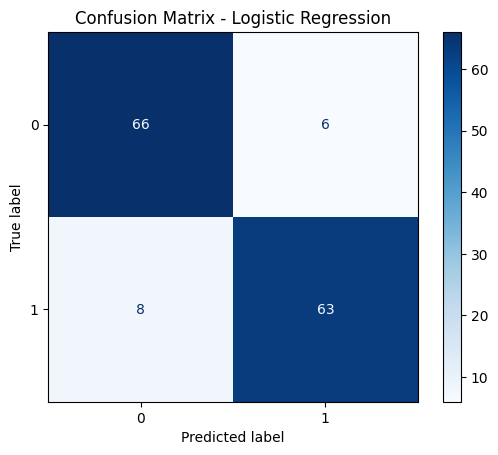


Evaluasi Model: Random Forest
Akurasi: 0.9301
              precision    recall  f1-score   support

     Dropout       0.93      0.93      0.93        72
    Graduate       0.93      0.93      0.93        71

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



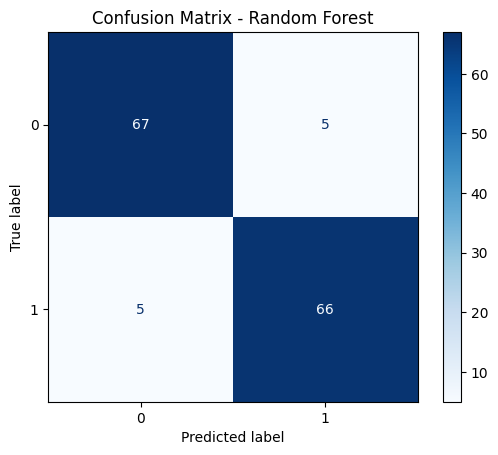


Evaluasi Model: SVM
Akurasi: 0.4825
              precision    recall  f1-score   support

     Dropout       0.33      0.03      0.05        72
    Graduate       0.49      0.94      0.64        71

    accuracy                           0.48       143
   macro avg       0.41      0.49      0.35       143
weighted avg       0.41      0.48      0.35       143



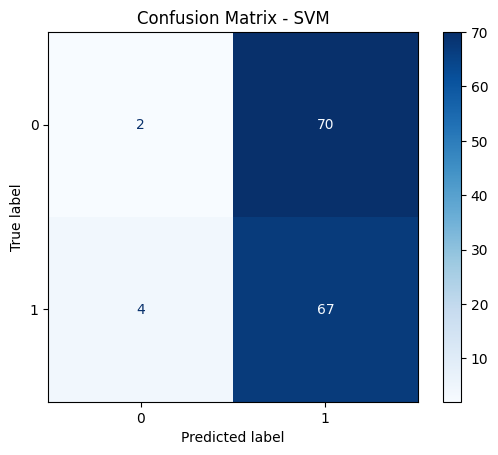


Evaluasi Model: KNN
Akurasi: 0.7622
              precision    recall  f1-score   support

     Dropout       0.78      0.74      0.76        72
    Graduate       0.75      0.79      0.77        71

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143



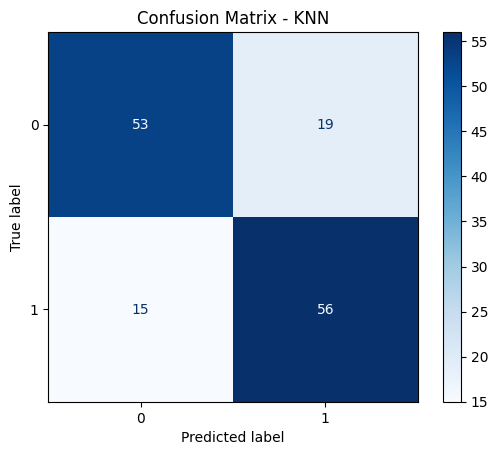


Evaluasi Model: Naive Bayes
Akurasi: 0.7972
              precision    recall  f1-score   support

     Dropout       0.85      0.72      0.78        72
    Graduate       0.76      0.87      0.81        71

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143



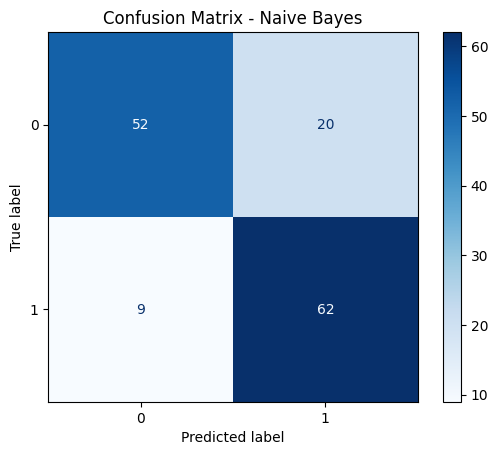


Evaluasi Model: MLP (Neural Network)
Akurasi: 0.8671
              precision    recall  f1-score   support

     Dropout       0.83      0.93      0.88        72
    Graduate       0.92      0.80      0.86        71

    accuracy                           0.87       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.87      0.87      0.87       143



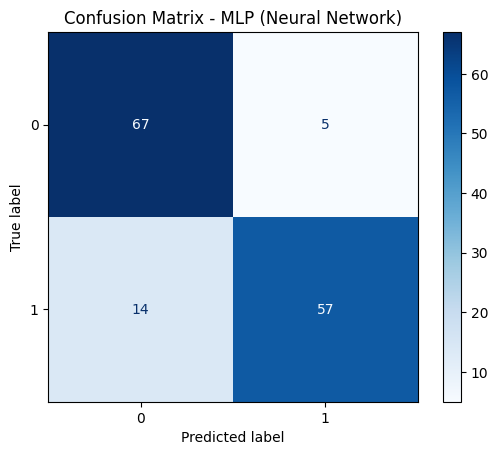


Evaluasi Model: XGBoost
Akurasi: 0.9580
              precision    recall  f1-score   support

     Dropout       0.99      0.93      0.96        72
    Graduate       0.93      0.99      0.96        71

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



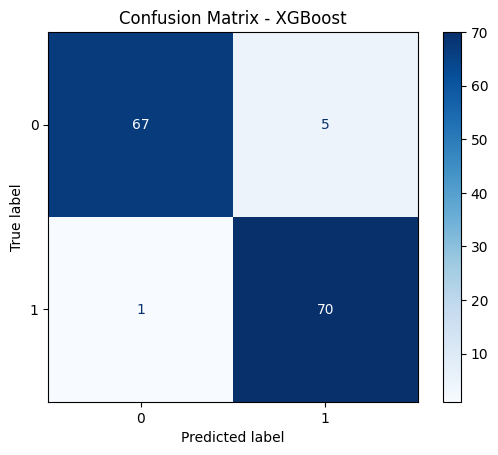

In [102]:
for name, model in models.items():
    print(f"\nEvaluasi Model: {name}")
    print("="*50)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Akurasi dan classification report
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()
